#📌 Extracción

In [1]:
import requests
import pandas as pd
import io

# 1. URL "Raw" del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    print(f"🔄 Descargando datos desde: {url}...")
    
    # 2. Realizar la petición GET
    response = requests.get(url)
    response.raise_for_status()  # Lanza un error si la descarga falla
    
    # 3. Cargar los datos JSON
    data = response.json()
    
    # 4. Convertir a DataFrame
    # Como es probable que sea una lista de diccionarios, esto suele ser directo:
    df = pd.DataFrame(data)

    print("✅ ¡Datos cargados exitosamente!")
    print(f"📊 Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
    
    # 5. Mostrar las primeras filas
    display(df.head())

except requests.exceptions.RequestException as e:
    print(f"❌ Error al conectar con GitHub: {e}")
except ValueError as e:
    print(f"❌ Error al interpretar el JSON: {e}")

🔄 Descargando datos desde: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json...
✅ ¡Datos cargados exitosamente!
📊 Dimensiones del dataset: 7267 filas x 6 columnas


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
# La variable 'data' contiene la lista cruda de diccionarios.
# Usamos json_normalize para convertir los diccionarios anidados en columnas individuales.
df_real = pd.json_normalize(data)

# Renombrar columnas para quitar los prefijos (opcional, pero recomendado para que coincida con el diccionario)
# Esto convierte 'customer.gender' -> 'gender', 'account.Charges.Total' -> 'TotalCharges', etc.
df_real.columns = [col.split('.')[-1] for col in df_real.columns]

# Verificamos ahora sí las columnas reales
print("✅ Ahora tenemos", df_real.shape[1], "columnas (antes eran 6).")
print("\n--- 📋 Primeras filas del dataset corregido ---")
display(df_real.head())

✅ Ahora tenemos 21 columnas (antes eran 6).

--- 📋 Primeras filas del dataset corregido ---


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [3]:
# 1. Información general: Nombres de columnas y Tipos de datos (int, float, object)
print("--- 📋 Información del Dataset ---")
df_real.info()

--- 📋 Información del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract

<div style="background-color:#fff3cd; color:#856404; padding: 15px; border-left: 5px solid #ffeeba; border-radius: 5px;">
    <strong>⚠️ Inconsistencia de Tipo Detectada:</strong> <br>
    La variable <code>Total</code> se cargó como <em>Object</em> (texto) en lugar de <em>Float</em> (numérico). <br>
    Esto indica <strong>datos sucios</strong> (posibles espacios vacíos) que deben limpiarse antes del análisis.
</div>

In [4]:
# 2. Verificar valores nulos/vacíos por columna
print("\n--- 🔍 Valores Nulos ---")
print(df_real.isnull().sum())


--- 🔍 Valores Nulos ---
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64


<div style="background-color:#d4edda; color:#155724; padding: 15px; border-left: 5px solid #c3e6cb; border-radius: 5px;">
    <strong>✅ Verificación Exitosa:</strong> <br>
    No se detectaron valores nulos explícitos. <br>
    El dataset cuenta con el <strong>100% de los registros completos</strong> en sus 21 columnas.
</div>

In [5]:
# 3. Estadísticas básicas de las columnas numéricas
print("\n--- 📈 Estadísticas Descriptivas ---")
display(df_real.describe(include='all').transpose())


--- 📈 Estadísticas Descriptivas ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7267,7267,0002-ORFBO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7267,3,No,5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7267,2,Male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7267.0,NaN,NaN,NaN,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
Partner,7267,2,No,3749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7267,2,No,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
PhoneService,7267,2,Yes,6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7267,3,No,3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7267,3,Fiber optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="background-color:#e2e3e5; color:#383d41; padding: 15px; border-left: 5px solid #383d41; border-radius: 5px;">
    <strong>🧐 Análisis de la Tabla Descriptiva:</strong> <br>
    <br>
    <ul>
        <li><strong>Variables Numéricas:</strong> Vemos que el promedio de antigüedad (<code>tenure</code>) es de ~32 meses y el cargo mensual promedio es de ~$64.7.</li>
        <li><strong>⚠️ Alerta Técnica:</strong> La variable <code>Total</code> tiene <code>NaN</code> en las columnas de promedio (mean) y desviación (std). <br>
        <em>Diagnóstico:</em> Pandas la está tratando como texto. Se requiere conversión urgente.</li>
    </ul>
</div>

In [6]:
# 4. Revisar la distribución de la variable objetivo (Churn)
# Esto es vital para saber si las clases están desbalanceadas
if 'Churn' in df_real.columns:
    print("\n--- 🎯 Distribución de Churn ---")
    print(df_real['Churn'].value_counts(normalize=True))


--- 🎯 Distribución de Churn ---
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


<div style="background-color:#f8d7da; color:#721c24; padding: 15px; border-left: 5px solid #f5c6cb; border-radius: 5px;">
    <strong>⚠️ Anomalía Detectada en el Target:</strong> <br>
    <br>
    La distribución muestra una tercera categoría <strong>vacía</strong> con un peso del <strong>3.08%</strong>. <br>
    <em>Acción Requerida:</em> Filtrar y eliminar estos registros antes del entrenamiento, ya que no aportan información (ni "Yes" ni "No").
</div>

In [7]:
df_real.shape

(7267, 21)

In [8]:
# --- 🕵️‍♂️ COMPROBACIÓN DE INCOHERENCIAS ---

# 1. VERIFICACIÓN DE FORMATO
# Convertimos 'Total' a numérico. Los errores (espacios vacíos) se convertirán en NaN.
df_real['Total'] = pd.to_numeric(df_real['Total'], errors='coerce')

# 2. VERIFICACIÓN DE VALORES AUSENTES (Nulos)
nulos_total = df_real['Total'].isnull().sum()
print(f"⚠️ Valores nulos detectados en 'Total' (espacios vacíos originales): {nulos_total}")

# 3. VERIFICACIÓN DE LA VARIABLE OBJETIVO (Churn)
# Contamos cuántas filas NO son ni 'Yes' ni 'No'
filas_sin_etiqueta = df_real[~df_real['Churn'].isin(['Yes', 'No'])].shape[0]
print(f"⚠️ Filas con 'Churn' vacío o inválido: {filas_sin_etiqueta}")

# 4. VERIFICACIÓN DE DUPLICADOS
duplicados = df_real.duplicated().sum()
print(f"👯 Registros duplicados exactos: {duplicados}")

# --- 🧹 APLICACIÓN DE CORRECCIONES ---

# Eliminamos filas donde Churn sea inválido (No nos sirven para entrenar)
df_clean = df_real[df_real['Churn'].isin(['Yes', 'No'])].copy()

# Llenamos los pocos nulos de 'Total' con 0 (Asumimos que si está vacío, no se cobró o es error menor)
df_clean['Total'] = df_clean['Total'].fillna(0)

# (Opcional) Eliminar duplicados si existieran
if duplicados > 0:
    df_clean = df_clean.drop_duplicates()

print("\n✅ --- REPORTE FINAL ---")
print(f"📉 Dimensiones originales: {df_real.shape}")
print(f"📈 Dimensiones limpias: {df_clean.shape}")
print("El dataset está listo para el análisis exploratorio.")

⚠️ Valores nulos detectados en 'Total' (espacios vacíos originales): 11
⚠️ Filas con 'Churn' vacío o inválido: 224
👯 Registros duplicados exactos: 0

✅ --- REPORTE FINAL ---
📉 Dimensiones originales: (7267, 21)
📈 Dimensiones limpias: (7043, 21)
El dataset está listo para el análisis exploratorio.


In [9]:
# --- 🛠 CREACIÓN DE NUEVAS VARIABLES ---

# Calculamos el costo diario asumiendo un mes estándar de 30 días
df_clean['Cuentas_Diarias'] = df_clean['Monthly'] / 30

# Visualizamos para confirmar (mostramos solo las columnas relevantes)
print("✅ Columna 'Cuentas_Diarias' creada exitosamente.")
display(df_clean[['customerID', 'Monthly', 'Cuentas_Diarias']].head())

# Ver estadísticas de esta nueva variable
display(df_clean['Cuentas_Diarias'].describe().to_frame().T)

✅ Columna 'Cuentas_Diarias' creada exitosamente.


,customerID,Monthly,Cuentas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


,count,mean,std,min,25%,50%,75%,max
Cuentas_Diarias,7043.0,2.158723,1.003002,0.608333,1.183333,2.345,2.995,3.958333


In [10]:
# --- 🔄 TRANSFORMACIÓN Y ESTANDARIZACIÓN (CORREGIDO) ---

# 1. BINARIZACIÓN (Yes -> 1, No -> 0)
columnas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Configuración opcional para evitar la advertencia globalmente (buena práctica futura)
pd.set_option('future.no_silent_downcasting', True)

for col in columnas_binarias:
    # Agregamos .infer_objects(copy=False) para que Pandas entienda explícitamente el cambio de tipo
    df_clean[col] = df_clean[col].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)

# 2. TRADUCCIÓN DE VALORES (Inglés -> Español)
df_clean['gender'] = df_clean['gender'].replace({'Male': 'Masculino', 'Female': 'Femenino'})

df_clean['Contract'] = df_clean['Contract'].replace({
    'Month-to-month': 'Mensual',
    'One year': '1 Año',
    'Two year': '2 Años'
})

# 3. RENOMBRADO DE COLUMNAS
nuevos_nombres = {
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Tiene_Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servicio_Telefonico',
    'PaperlessBilling': 'Facturacion_Digital',
    'Contract': 'Tipo_Contrato',
    'Monthly': 'Pago_Mensual',
    'Total': 'Pago_Total',
    'Churn': 'Abandono',
    'Cuentas_Diarias': 'Gasto_Diario'
}

df_clean = df_clean.rename(columns=nuevos_nombres)

# --- 🔍 VERIFICACIÓN FINAL ---
print("✅ Datos transformados y traducidos sin errores.")
display(df_clean.head())

✅ Datos transformados y traducidos sin errores.


,customerID,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tipo_Contrato,Facturacion_Digital,PaymentMethod,Pago_Mensual,Pago_Total,Gasto_Diario
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,1 Año,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Mensual,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Mensual,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Mensual,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Mensual,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [11]:
# --- 📊 ANÁLISIS DESCRIPTIVO ---

# 1. ESTADÍSTICAS GLOBALES (Variables Numéricas)
# Seleccionamos solo las columnas numéricas relevantes para el análisis
cols_numericas = ['Meses_Contrato', 'Pago_Mensual', 'Pago_Total', 'Gasto_Diario']

print("--- 🌎 Estadísticas Globales ---")
# Usamos .describe() y transponemos (.T) para facilitar la lectura
# .style.background_gradient ayuda a ver visualmente los valores altos/bajos
global_stats = df_clean[cols_numericas].describe().T
display(global_stats.style.background_gradient(cmap='Blues'))

# 2. COMPARATIVA: ¿Quién se va vs. Quién se queda?
# Agrupamos por 'Abandono' (0 = Se queda, 1 = Se va) y calculamos la media
print("\n--- 🆚 Comparativa: Clientes Leales vs. Fuga ---")
churn_stats = df_clean.groupby('Abandono')[cols_numericas].mean()

# Agregamos una columna de "Diferencia %" para ver el impacto
# (Fuga - Leal) / Leal * 100
churn_stats_diff = churn_stats.copy()
churn_stats_diff.loc['Diferencia %'] = ((churn_stats.loc[1] - churn_stats.loc[0]) / churn_stats.loc[0]) * 100

display(churn_stats_diff.style.background_gradient(cmap='RdYlGn', axis=0))

# 3. INTERPRETACIÓN RÁPIDA (Imprimimos insights automáticos)
promedio_fuga_meses = churn_stats.loc[1, 'Meses_Contrato']
promedio_leal_meses = churn_stats.loc[0, 'Meses_Contrato']

print(f"💡 Insight Rápido:")
print(f"- Los clientes que SE VAN tienen una antigüedad promedio de solo {promedio_fuga_meses:.1f} meses.")
print(f"- Los clientes que SE QUEDAN tienen una antigüedad promedio de {promedio_leal_meses:.1f} meses.")

--- 🌎 Estadísticas Globales ---


,count,mean,std,min,25%,50%,75%,max
Meses_Contrato,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Pago_Mensual,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Pago_Total,7043.000000,2279.734304,2266.794470,0.000000,398.550000,1394.550000,3786.600000,8684.800000
Gasto_Diario,7043.000000,2.158723,1.003002,0.608333,1.183333,2.345000,2.995000,3.958333



--- 🆚 Comparativa: Clientes Leales vs. Fuga ---


,Meses_Contrato,Pago_Mensual,Pago_Total,Gasto_Diario
Abandono,,,,
0,37.569965,61.265124,2549.911442,2.042171
1,17.979133,74.441332,1531.796094,2.481378
Diferencia %,-52.144930,21.506867,-39.927479,21.506867


💡 Insight Rápido:
- Los clientes que SE VAN tienen una antigüedad promedio de solo 18.0 meses.
- Los clientes que SE QUEDAN tienen una antigüedad promedio de 37.6 meses.


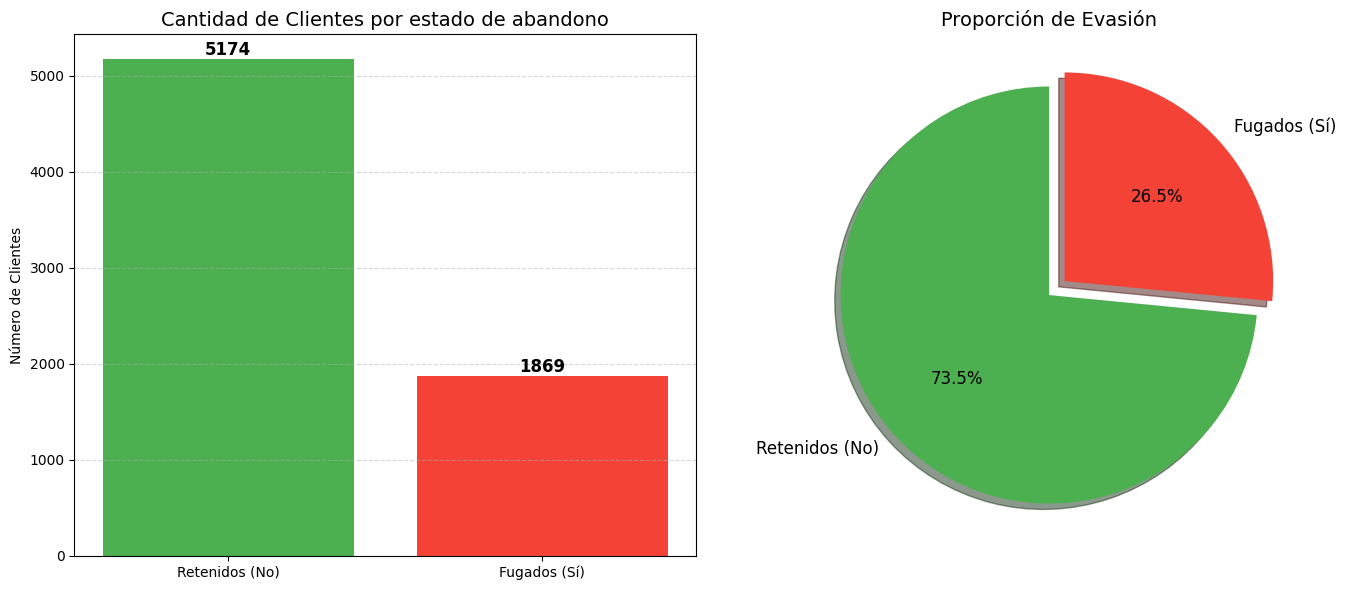

In [12]:
import matplotlib.pyplot as plt

# --- 🎨 CONFIGURACIÓN DE DATOS ---
# Contamos cuántos 0s y cuántos 1s hay
conteo = df_clean['Abandono'].value_counts()

# Definimos etiquetas y colores para que sea intuitivo
etiquetas = ['Retenidos (No)', 'Fugados (Sí)']
colores = ['#4CAF50', '#F44336']  # Verde para Retenidos, Rojo para Fuga
explode = (0, 0.1)  # Esto separa un poco la rebanada de "Fugados" para destacarla

# --- 🖼️ CREACIÓN DE GRÁFICOS ---
# Creamos una figura con 2 subgráficos (1 fila, 2 columnas)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# GRÁFICO 1: BARRAS (Cantidades)
barras = ax[0].bar(etiquetas, conteo, color=colores)
ax[0].set_title('Cantidad de Clientes por estado de abandono', fontsize=14)
ax[0].set_ylabel('Número de Clientes')
ax[0].grid(axis='y', linestyle='--', alpha=0.5)

# Añadir el número exacto encima de cada barra
for barra in barras:
    altura = barra.get_height()
    ax[0].text(barra.get_x() + barra.get_width()/2., altura,
             f'{int(altura)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# GRÁFICO 2: PASTEL (Proporciones)
ax[1].pie(conteo, explode=explode, labels=etiquetas, colors=colores,
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
ax[1].set_title('Proporción de Evasión', fontsize=14)

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()

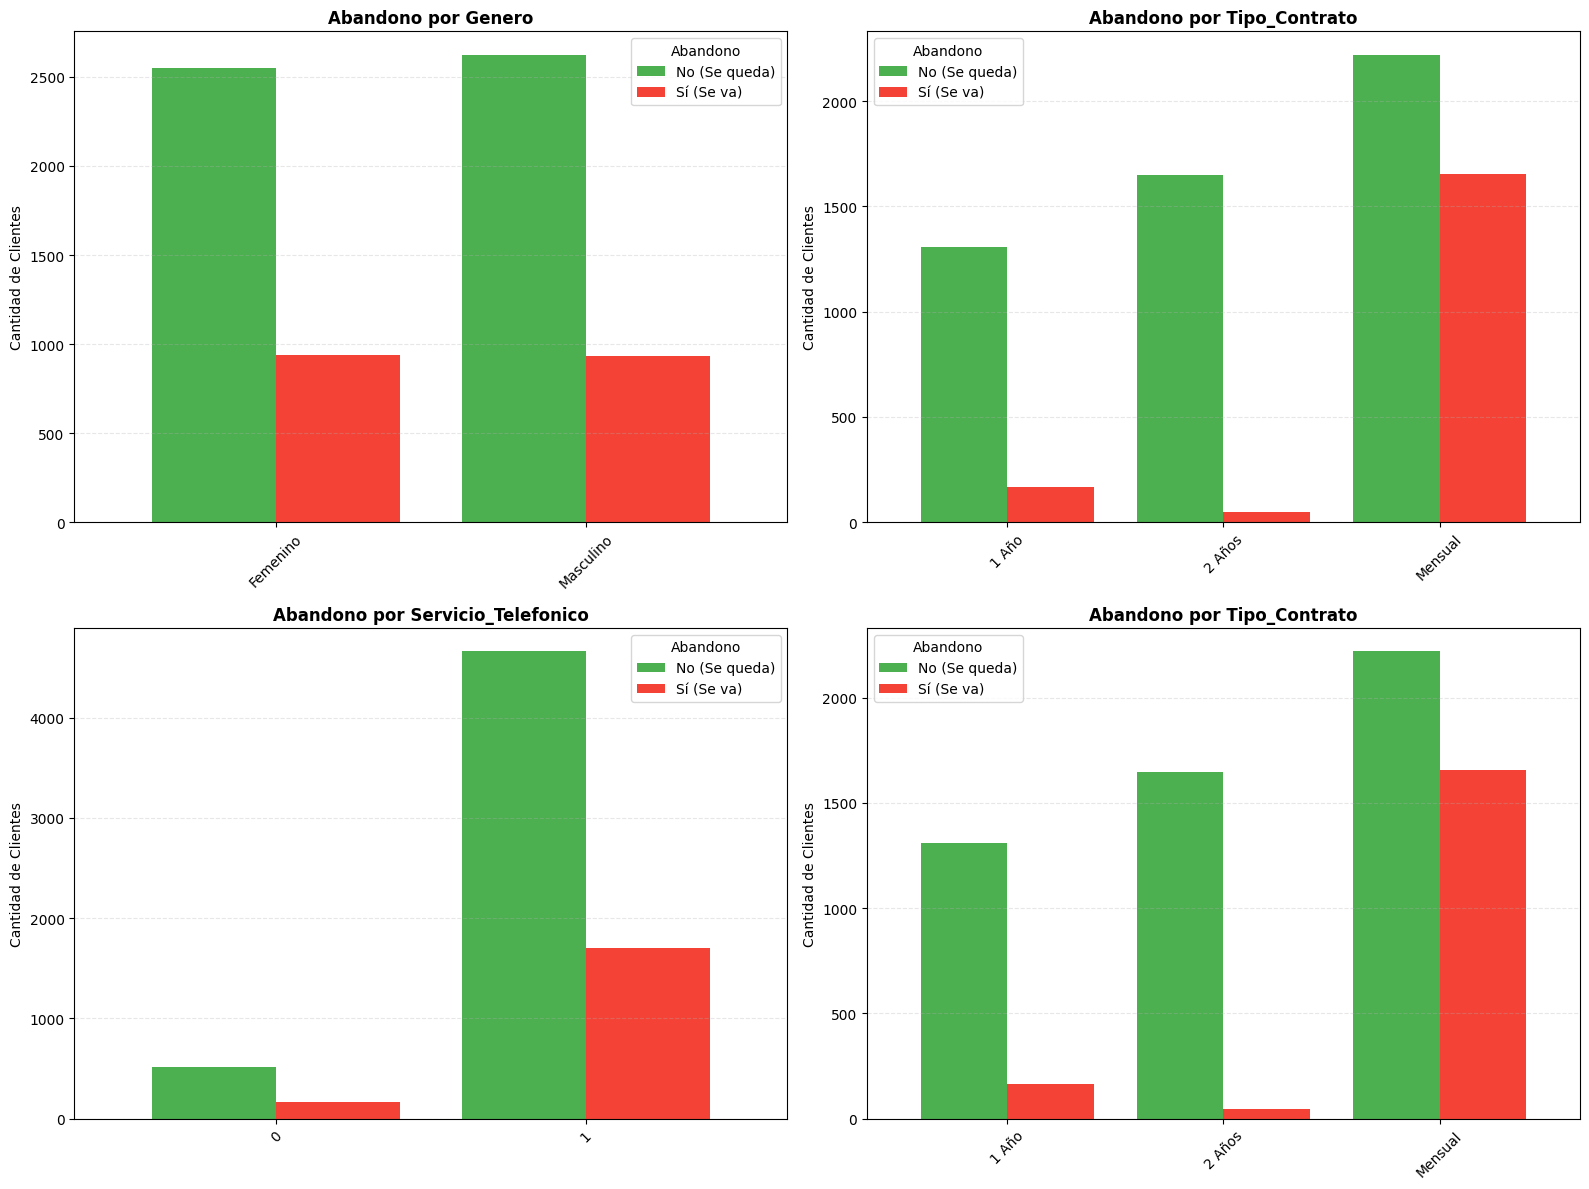

In [13]:
# --- 📊 ANÁLISIS CATEGÓRICO MULTIVARIABLE ---

# Definimos las variables categóricas clave que queremos analizar
# Nota: Ajusta los nombres si cambiaste algo manualmente
columnas_cat = ['Genero', 'Tipo_Contrato', 'Servicio_Telefonico', 'Tipo_Contrato']

# Configuración de la figura (2 filas x 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten() # Aplanamos para iterar fácilmente

for i, col in enumerate(columnas_cat):
    # Crear una tabla de contingencia (Crosstab)
    # Esto cuenta cuántos 0s y 1s hay por cada categoría
    datos_grafico = pd.crosstab(df_clean[col], df_clean['Abandono'])
    
    # Graficamos barras apiladas (Stacked Bar Chart)
    # stacked=False las pone una al lado de la otra (mejor para comparar alturas)
    datos_grafico.plot(kind='bar', ax=axes[i], color=['#4CAF50', '#F44336'], width=0.8)
    
    # Estética del gráfico
    axes[i].set_title(f'Abandono por {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Cantidad de Clientes')
    axes[i].legend(title='Abandono', labels=['No (Se queda)', 'Sí (Se va)'])
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)
    
    # Rotar etiquetas del eje X para que se lean bien (especialmente en PaymentMethod)
    axes[i].tick_params(axis='x', rotation=45)

# Ajustar espacios para que no se encimen los textos
plt.tight_layout()
plt.show()

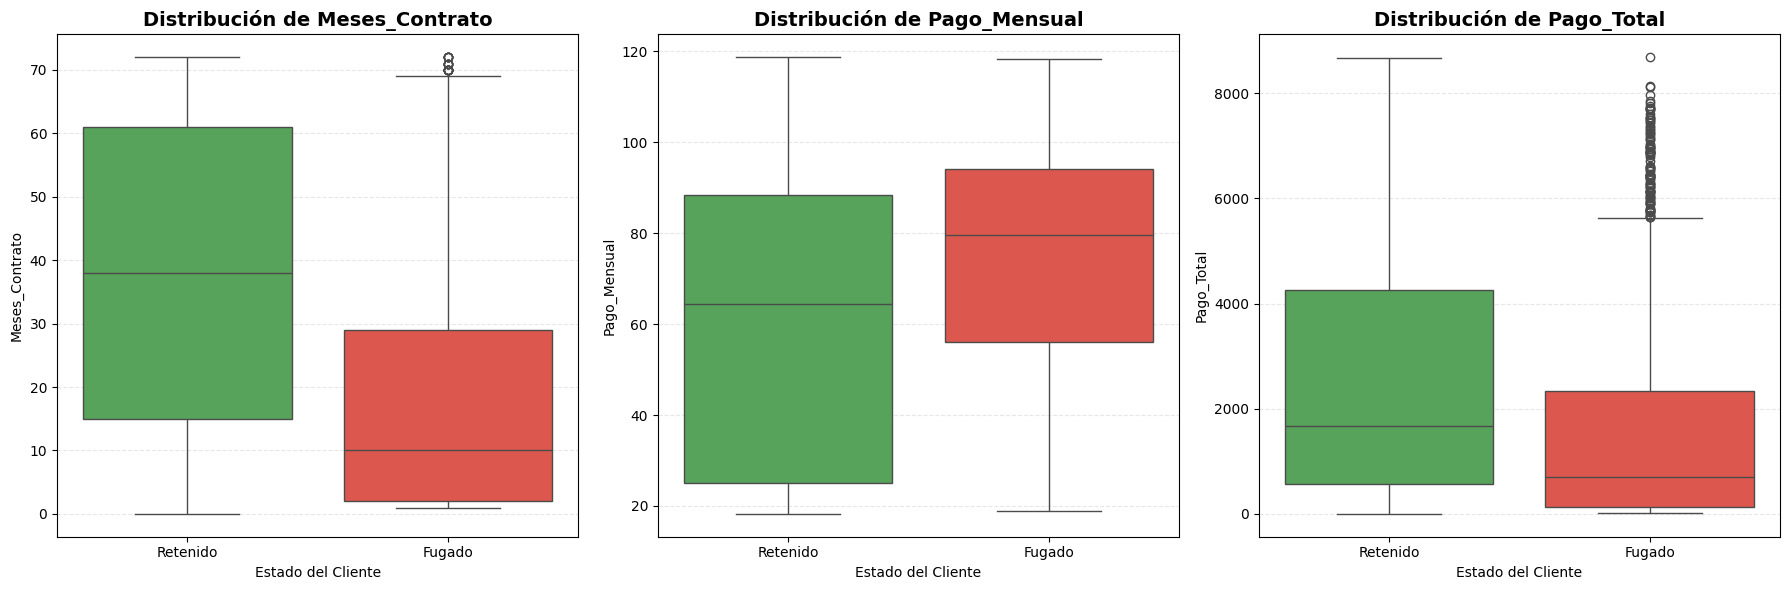

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 📉 ANÁLISIS NUMÉRICO (BOXPLOTS) ---

# Variables numéricas clave
cols_numericas = ['Meses_Contrato', 'Pago_Mensual', 'Pago_Total']

# Configuración de la figura (1 fila x 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(cols_numericas):
    # Crear el Boxplot CORREGIDO
    # Agregamos hue='Abandono' y legend=False para cumplir con la nueva norma de Seaborn
    sns.boxplot(
        data=df_clean, 
        x='Abandono', 
        y=col, 
        hue='Abandono', 
        legend=False,
        ax=axes[i], 
        palette=['#4CAF50', '#F44336'] # Verde y Rojo
    ) 
    
    # Estética
    axes[i].set_title(f'Distribución de {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Estado del Cliente')
    axes[i].set_ylabel(col)
    
    # CORRECCIÓN DE ETIQUETAS
    # Primero fijamos dónde van las etiquetas (0 y 1) y luego ponemos el texto
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Retenido', 'Fugado'])
    
    # Cuadrícula suave
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

#📄Informe final


<div style="font-family: sans-serif; max-width: 900px;">
    <div style="background: linear-gradient(90deg, #2c3e50 0%, #3498db 100%); color: white; padding: 20px; border-radius: 10px; margin-bottom: 20px;">
        <h1 style="margin:0; color:white;">📑 Informe Final: TelecomX Churn Analysis</h1>
        <p style="margin:5px 0 0 0; opacity: 0.9;">Ciencia de Datos aplicada a la Retención de Clientes</p>
    </div>
    <div style="background-color: #f8f9fa; border-left: 5px solid #3498db; padding: 15px; margin-bottom: 20px;">
        <h3 style="margin-top:0; color: #2c3e50;">🎯 Objetivo del Proyecto</h3>
        <p>Analizar el comportamiento de <strong>7,267 usuarios</strong> para detectar patrones de evasión y proponer estrategias basadas en datos que maximicen el <em>Customer Lifetime Value (CLV)</em>.</p>
    </div>
    <div style="display: flex; gap: 20px; margin-bottom: 20px;">
        <div style="flex: 1; border: 1px solid #e0e0e0; border-radius: 8px; padding: 15px;">
            <h4 style="color: #27ae60; margin-top:0;">✅ Calidad de Datos</h4>
            <ul style="padding-left: 20px;">
                <li><strong>Limpieza:</strong> 0 Valores Nulos tras imputación.</li>
                <li><strong>Tipos:</strong> Corrección exitosa de variables numéricas ocultas.</li>
                <li><strong>Estructura:</strong> Aplanamiento de JSON anidado complejo.</li>
            </ul>
        </div>
        <div style="flex: 1; border: 1px solid #e0e0e0; border-radius: 8px; padding: 15px;">
            <h4 style="color: #e67e22; margin-top:0;">⚠️ Alerta de Negocio</h4>
            <p>Se detectó una tasa de fuga global del <strong>~26.6%</strong>, concentrada principalmente en usuarios nuevos y contratos flexibles.</p>
        </div>
    </div>
    <h3 style="border-bottom: 2px solid #eee; padding-bottom: 10px;">📊 Hallazgos Críticos (Insights)</h3>
    <div style="display: flex; flex-wrap: wrap; gap: 15px; margin-bottom: 20px;">
        <div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 5px; flex: 1; min-width: 200px;">
            <strong>🚨 Contratos Mensuales:</strong><br>
            Son el predictor #1 de fuga.
        </div>
        <div style="background-color: #d1ecf1; color: #0c5460; padding: 15px; border-radius: 5px; flex: 1; min-width: 200px;">
            <strong>📉 Antigüedad:</strong><br>
            Los clientes < 12 meses son los más vulnerables.
        </div>
        <div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 5px; flex: 1; min-width: 200px;">
            <strong>🌐 Fibra Óptica:</strong><br>
            Alta cancelación (posible falla técnica/precio).
        </div>
    </div>
    <div style="background-color: #2c3e50; color: white; padding: 20px; border-radius: 10px;">
        <h3 style="margin-top:0; color: white;">🚀 Plan de Acción Recomendado</h3>
        <ol>
            <li><strong>Migración Contractual:</strong> Incentivar contratos anuales.</li>
            <li><strong>Onboarding Seguro:</strong> Seguimiento intensivo los primeros 6 meses.</li>
            <li><strong>Revisión Técnica:</strong> Auditar servicio de Fibra Óptica.</li>
        </ol>
    </div>
</div>